# Install Dependencies

In [ ]:
%pip install pandas numpy matplotlib scikit-learn

# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA

# Load Dataset 1

In [2]:
df_1 = pd.read_csv("persons.csv")
df_1

,NAME,AGE,HOUR,INCOME
0,JAINIL,18,22,10000
1,ZAID,60,3,67000
2,KRISHNA,55,4,63000
3,PALAK,16,20,12000
4,ISHITA,63,2,58000
5,TWISHA,17,19,13000
6,AKSHAT,64,1,62000
7,DARSHAN,19,20,12000
8,KRISHA,34,14,24000
9,RAJ,61,1,65000


# Select Features

In [3]:
X_1 = df_1[['AGE', 'HOUR', 'INCOME']].values

# Apply K-Means

In [4]:
n_clusters = 4
kmeans_1 = KMeans(n_clusters=n_clusters, random_state=42)
labels_1 = kmeans_1.fit_predict(X_1)
centroids_1 = kmeans_1.cluster_centers_

# Manual Check

In [5]:
df_1['Cluster'] = labels_1
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    print(df_1[df_1['Cluster'] == cluster])
    print("\n" + "-"*50 + "\n")

Cluster 0:
        NAME  AGE  HOUR  INCOME  Cluster
0     JAINIL   18    22   10000        0
3      PALAK   16    20   12000        0
5     TWISHA   17    19   13000        0
7    DARSHAN   19    20   12000        0
14   VIBHAVI   18    21   11000        0
15      RUTU   17    25    9000        0
18  SHRADHHA   18    22    7000        0
19     SWETA   19    21    8000        0

--------------------------------------------------

Cluster 1:
      NAME  AGE  HOUR  INCOME  Cluster
1     ZAID   60     3   67000        1
2  KRISHNA   55     4   63000        1
9      RAJ   61     1   65000        1

--------------------------------------------------

Cluster 2:
      NAME  AGE  HOUR  INCOME  Cluster
8   KRISHA   34    14   24000        2
10   MANOJ   33    14   23000        2
11     DEV   37    16   24000        2
12    FAIZ   38    18   27000        2
13     JAY   23    10   19000        2
16  PRACHI   30    17   23000        2

--------------------------------------------------

Cluster 3:

# Visualization Settings

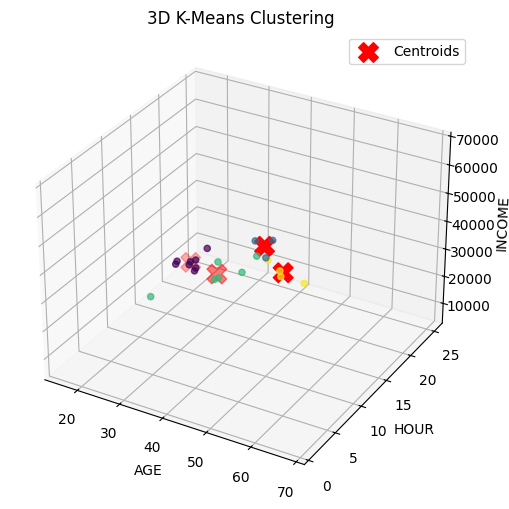

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_1[:, 0], X_1[:, 1], X_1[:, 2], c=labels_1, cmap='viridis', alpha=0.7)
ax.scatter(centroids_1[:, 0], centroids_1[:, 1], centroids_1[:, 2], 
           c='red', marker='X', s=200, label='Centroids')
ax.set_xlabel("AGE")
ax.set_ylabel("HOUR")
ax.set_zlabel("INCOME")
ax.set_title("3D K-Means Clustering")
plt.legend()
plt.show()

# Load Dataset 2

In [ ]:
iris = datasets.load_iris()
df_2 = pd.DataFrame(iris.data, columns=iris.feature_names)
df_2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Select Features

In [8]:
X_2 = df_2[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values

# Apply K-Means

In [9]:
kmeans_2 = KMeans(n_clusters=3, random_state=42)
labels_2 = kmeans_2.fit_predict(X_2)
centroids_2 = kmeans_2.cluster_centers_

# Visualization Settings

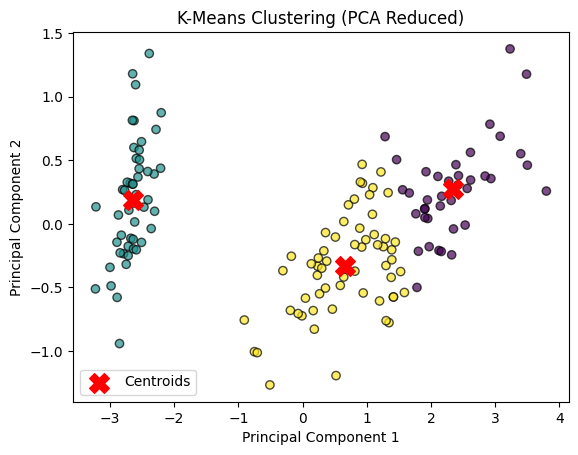

In [ ]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_2)

plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=labels_2, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(pca.transform(centroids_2)[:, 0], pca.transform(centroids_2)[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA Reduced)")
plt.legend()
plt.show()